In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

# Comparing Euler method and RK4 method

In [5]:
# Parameters of a chaotic Lorenz system
r, s, b = (28, 10, 8/3)

# Setting the time step and total simulation time
dt = 0.001
max_steps = 120000
initial_transmitter_conditions = np.random.uniform(0,10,size=3)     # Both systems should synchronise regardless of starting values
initial_receiver_conditions = np.random.uniform(0,10,size=3)

def transmitter(transmitter_state): # Takes the xyz of the transmitter and outputs the dx,dy,dz of the transmittter
    x,y,z = transmitter_state
    dx_dt = s*(y-x)
    dy_dt = (r*x -y - x*z)
    dz_dt = (x*y -b*z)
    return np.array([dx_dt,dy_dt,dz_dt])    # Create the list using [], then call function array() to convert that list into an array

def receiver(receiver_state, signal): # Takes the xyz of the receiver and outputs the dx,dy,dz of the receiver
    x,y,z = receiver_state
    dx_dt = (s*(y-x))
    dy_dt =(r*signal -y - signal*z)
    dz_dt = (signal*y -b*z)
    return np.array([dx_dt,dy_dt,dz_dt])

def Euler(initial_state, function, *arg): # Takes the initial xyz of the function (either rcv/trm) and returns the next calculated xyz using euler method
    dx_dt,dy_dt,dz_dt = function(initial_state, *arg)
    x,y,z = initial_state
    x += dx_dt*dt
    y += dy_dt*dt
    z += dz_dt*dt
    return np.array([x,y,z])

def RMSE(message, decrypted_signal):    # Calculates root mean square error by comparing two different set of values
    error_sum = 0
    for i in range(len(message)):
        error_sum += (message[i]-decrypted_signal[i])**2
    rms_error = np.sqrt((1/len(message))*error_sum)
    return rms_error

euler_rmse=[]

# Loop through increasing number of steps up to max steps in intervals of 1000 starting from 10
for j in range(10,max_steps,1000):
    steps = j
    t = np.linspace(0,steps*dt,steps+1)     # Creates the t values used for each number of steps run

    # Create the array for the transmitter and receiver xyz values with their initial conditions
    transmitter_xyz = np.empty((steps+1,3))
    transmitter_xyz[0] = initial_transmitter_conditions

    receiver_xyz = np.empty((steps+1,3))
    receiver_xyz[0] = initial_receiver_conditions

    # Creates array of transmitter xyz values using Euler method
    for i in range(steps):  
        transmitter_xyz[i+1] = Euler(transmitter_xyz[i], transmitter)

    # Produces the transmitted signal by encrypting the message with x values of the transmitter
    message = np.sin(60*t)
    mask = transmitter_xyz[:,0]
    signal = message + mask

    # Creates array of receiver xyz values using Euler method
    for i in range(steps):
        receiver_xyz[i+1] = Euler(receiver_xyz[i], receiver, signal[i])
    
    # Decrypts signal by subtracting the receiver x values from the transmitted signal
    decrypted_signal = signal - receiver_xyz[:,0]
    
    # Compares the root mean square error between the message and decrypted signal and adds them into list for plotting
    euler_rmse.append(RMSE(message, decrypted_signal))
    

# 4th Order Runge Kutta method (RK4)
def RK4(dt, function, state, *args):
    k1 = function(state, *args)
    k2 = function(state + (dt*k1)/2, *args)
    k3 = function(state + (dt*k2)/2, *args)
    k4 = function(state + dt*k3, *args)
    return state + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

x_steps = []    # For the x axis of the graph
RK4_rmse = []
for j in range(10,max_steps,1000):
    steps = j
    t = np.linspace(0,steps*dt,steps+1)

    # Initial conditions for transmitter
    transmitter_xyz = np.empty((steps + 1, 3))  # Need one more for the initial values
    transmitter_xyz[0] = initial_transmitter_conditions 

    # Initial conditions for receiver
    receiver_xyz = np.empty((steps + 1, 3)) 
    receiver_xyz[0] = initial_receiver_conditions

    for i in range(steps):  # Calculates transmitter values using RK4
        transmitter_xyz[i + 1] = RK4(dt, transmitter, transmitter_xyz[i])

    message = np.sin(60*t)
    mask = transmitter_xyz[:,0]
    signal = message + mask

    for i in range(steps):  # Calculates receiver values using RK4 with input signal
        receiver_xyz[i + 1] = RK4(dt, receiver, receiver_xyz[i], signal[i])

    xr_values = receiver_xyz[:, 0]
    decrypted_signal = signal - xr_values

    x_steps.append(steps)   # Creates a list of number of steps used for each run for plotting on the x axis

    RK4_rmse.append(RMSE(message, decrypted_signal))

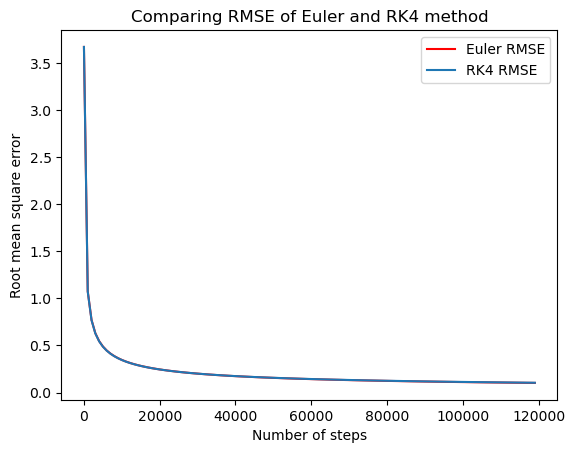

In [3]:
plt.plot(x_steps,euler_rmse,color = 'red',label='Euler RMSE')
plt.plot(x_steps,RK4_rmse,label = 'RK4 RMSE')
plt.title('Comparing RMSE of Euler and RK4 method')
plt.xlabel('Number of steps')
plt.ylabel('Root mean square error')
plt.legend()

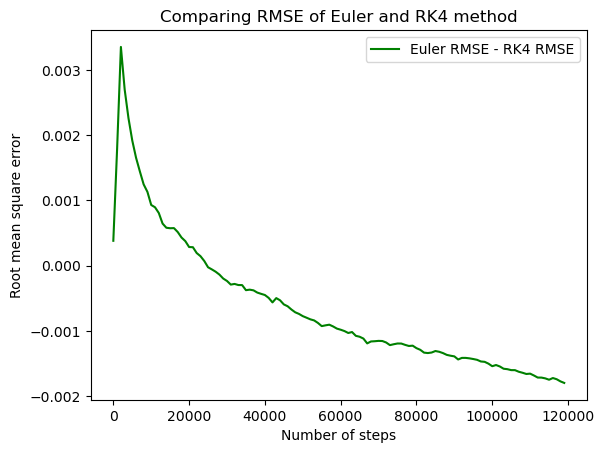

In [4]:
RMSE_difference = np.array(euler_rmse) - np.array(RK4_rmse)
plt.plot(x_steps,RMSE_difference,color='green',label='Euler RMSE - RK4 RMSE')
plt.title('Comparing RMSE of Euler and RK4 method')
plt.xlabel('Number of steps')
plt.ylabel('Root mean square error')
plt.legend()

# Comparing usage of different variables

In [ ]:
# Parameters of a chaotic Lorenz system
r, s, b = (28, 10, 8/3)

# Setting the time step and total simulation time
dt = 0.001
max_steps = 120000

# The two systems should synchronise regardless of their initial conditions
initial_transmitter_conditions = np.random.uniform(0,10,size=3)
initial_receiver_conditions = np.random.uniform(0,10,size=3)

# Defining the transmitter Lorenz system
def transmitter(initial_transmitter):
    x, y, z = initial_transmitter   # Initial conditions unpacked as a tuple
    dx_dt = s*(y-x)
    dy_dt = r*x - y - x*z
    dz_dt = x*y - b*z
    return np.array([dx_dt, dy_dt, dz_dt])

# 4th Order Runge Kutta method (RK4)
def RK4(dt, function, state, *args):
    k1 = function(state, *args)
    k2 = function(state + (dt*k1)/2, *args)
    k3 = function(state + (dt*k2)/2, *args)
    k4 = function(state + dt*k3, *args)
    return state + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

# Compares the message and the decrypted signal and outputs the root mean square error
def RMSE(message, decrypted_signal):
    error_sum = 0
    for i in range(len(message)):
        error_sum += (message[i]-decrypted_signal[i])**2
    rms_error = np.sqrt((1/len(message))*error_sum)
    return rms_error


In [ ]:
# Defining the receiver Lorenz system for x
def receiver(initial_receiver, input_signal):
    x, y, z = initial_receiver 
    dx_dt = s*(y-x) 
    dy_dt = r*input_signal - y - input_signal*z
    dz_dt = input_signal*y - b*z
    return np.array([dx_dt, dy_dt, dz_dt])

x_steps = []
x_rmse = []
for j in range(10,max_steps,1000):
    steps = j
    t = np.linspace(0,steps*dt,steps+1)

    # Creates arrays and initial conditions for receiver and transmitter systems
    state_transmitter = np.empty((steps + 1, 3))  
    state_transmitter[0] = initial_transmitter_conditions 

    state_receiver = np.empty((steps + 1, 3)) 
    state_receiver[0] = initial_receiver_conditions  

    for i in range(steps):  # Calculates transmitter values using RK4
        state_transmitter[i + 1] = RK4(dt, transmitter, state_transmitter[i])

    # Generates the encrypted signal by addding the mask (x values of transmitter in this case) to the message
    message = np.sin(60*t)
    x_values = state_transmitter[:, 0]  
    masked_values = x_values + message

    for i in range(steps):  # Calculates the receiver values using RK4
        state_receiver[i + 1] = RK4(dt, receiver, state_receiver[i], masked_values[i])

    # Decrypting the signal by subtracting the regenerated mask (in this case x values of receiver)
    xr_values = state_receiver[:, 0]
    decrypt = masked_values - xr_values

    x_steps.append(steps)   # For plotting x axis

    x_rmse.append(RMSE(message, decrypt))   # Creates list of RMSE values for each number of steps

# Defining the receiver Lorenz system for y
def receiver(initial_receiver, input_signal):
    x, y, z = initial_receiver 
    dx_dt = s*(input_signal-x) 
    dy_dt = r*x - y - x*z
    dz_dt = x*input_signal - b*z
    return np.array([dx_dt, dy_dt, dz_dt])

y_rmse = []
for j in range(10,max_steps,1000):
    steps = j
    t = np.linspace(0,steps*dt,steps+1)

    state_transmitter = np.empty((steps + 1, 3))  
    state_transmitter[0] = initial_transmitter_conditions 

    state_receiver = np.empty((steps + 1, 3)) 
    state_receiver[0] = initial_receiver_conditions

    for i in range(steps):
        state_transmitter[i + 1] = RK4(dt, transmitter, state_transmitter[i])

    message = np.sin(60*t)
    y_values = state_transmitter[:, 1]  
    masked_values = y_values + message

    for i in range(steps):
        state_receiver[i + 1] = RK4(dt, receiver, state_receiver[i], masked_values[i])

    yr_values = state_receiver[:, 1]
    decrypt = masked_values - yr_values


    y_rmse.append(RMSE(message, decrypt))

# Defining the receiver Lorenz system for z
def receiver(initial_receiver, input_signal):
    x, y, z = initial_receiver 
    dx_dt = s*(y-x) 
    dy_dt = r*x - y - x*input_signal
    dz_dt = x*y - b*z
    return np.array([dx_dt, dy_dt, dz_dt])

z_rmse = []
for j in range(10,max_steps,1000):
    steps = j
    t = np.linspace(0,steps*dt,steps+1)

    state_transmitter = np.empty((steps + 1, 3))
    state_transmitter[0] = initial_transmitter_conditions 

    state_receiver = np.empty((steps + 1, 3)) 
    state_receiver[0] = initial_receiver_conditions 

    for i in range(steps):
        state_transmitter[i + 1] = RK4(dt, transmitter, state_transmitter[i])

    message = np.sin(60*t)
    z_values = state_transmitter[:, 2]  
    masked_values = z_values + message

    for i in range(steps):
        state_receiver[i + 1] = RK4(dt, receiver, state_receiver[i], masked_values[i])

    zr_values = state_receiver[:, 2]
    decrypt = masked_values - zr_values


    z_rmse.append(RMSE(message, decrypt))


In [ ]:
plt.plot(x_steps,x_rmse,color='blue',label='x RMSE')
plt.plot(x_steps,y_rmse,color='green',label='y RMSE')
plt.plot(x_steps,z_rmse,color='red',label='z RMSE')
plt.legend()
plt.title('RMSE of different variables')
plt.xlabel('Number of steps')
plt.ylabel('Root Mean Square Error')